# Sestup po gradientu
Sestup po gradientu nebo také též **gradientní sestup** je algoritmus pro nalezení optima diferencovatelné reálné funkce často využívaný ve strojovém učení a umělé inteligenci pro **snížení hodnoty ztrátové funkce** (*tj. loss function*).

## Princip funkčnosti
Sestup po gradientu využívá vlastnosti **gradientu funkce**. K nalezení minima se iterativně pohybujeme proti směru daného vektoru a po krocích určité délky. Tímto způsobem se pohybujeme v ideálním směru nejvyššího klesání funkce.

## Gradient funkce
Gradient funkce je diferenciální operátor, který funkci $f$ přiřadí vektor $v$ směřující k nejvyššímu růstu funkce, gradient značíme $\nabla f$. Gradient vypočteme jako

$$\nabla f(x_1, ..., x_n) = \sum_{i=1}^{n} \frac{\partial f}{\partial x_i} E_i$$

, kde $E_i$ je *i-tý* člen kanonické báze vektorového prostoru $R^n$.



## Příklad výpočtu gradientu
Cíl: Vypočíst gradient funkce:
$$f(x,y) = 3x^2 + 5y^3$$

$$\nabla f(x,y) = \frac{\partial f}{\partial x} (1,0) + \frac{\partial f}{\partial y}(0,1) = (6x, 15y^2)$$

Skalární pole $(6x, 15y^2)$ popisuje nejvyšší změny ve všech bodech spojitosti $f.$

## Sestup po funkci $f(x) = 4x^2$
Pomocí metody sestupu po gradientu nalezneme minimum reálné funkce $f(x) = 4x^2$. Gradientem dané funkce je:
$$\nabla f = (8x, 0)$$
Budeme tedy sestupovat posloupností danou vztahem:
$$ a_{n+1} = a_n - \gamma \nabla f $$

s parametrem $\gamma$ a vždy se posuneme na hodnotu $f(a_{n+1})$.

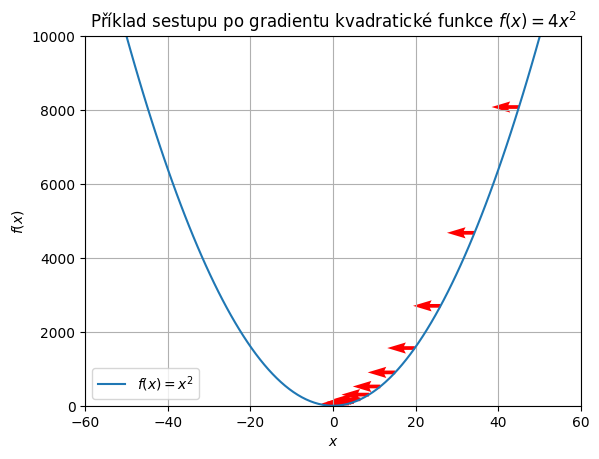

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

#Naše funkce
def f(x):
  return 4*(x*x)

#Použijeme gradient
def get_next_a_n(point):
  return np.array([8*point[0], 0])

def move_to_next_point(a_n, vector, gamma):
  a_n[0] = a_n[0] - (gamma * vector[0])
  a_n[1] = f(a_n[0])
  return a_n

def gradient_descend_vector_plot(iterations, a_1, gamma):
  a_n = a_1
  for i in range(iterations):
    gradient_val = get_next_a_n(a_1)
    plt.quiver(a_n[0], a_n[1], -gradient_val[0], gradient_val[1], color="red")
    a_n = move_to_next_point(a_n, gradient_val, gamma)
    #print("Iteration: " + str(iterations) + ", a_n = " + str(a_n))

gamma = 0.03

x = np.linspace(-50, 50, 100)
y = f(x)

#Bod, kdy začínáme se sestupem
a1_x = math.floor(np.random.uniform(-50, 50, 1))
a1_y = y[abs(a1_x) + 49]

a1 = np.array([a1_x, a1_y])

gradient_descend_vector_plot(10, a1, gamma)
plt.plot(x, y, label="$f(x)=x^2$")
plt.grid()
plt.legend()
plt.title("Příklad sestupu po gradientu kvadratické funkce $f(x) = 4x^2$")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.xlim((-60, 60))
plt.ylim((0, 10e3))

plt.show()

## Sestup po gradientu ztrátové funkce MSE
Ztrátová funkce MSE (mean squared error) je funkce využívaná ve strojovém učení k minimalizaci ztrátových funkcí a konvergenci k optimu.

### Mean squared error
Nechť $$f(x_1,...,x_n) = \sum_{i=1}^{n}w_ix_i + b$$
je reálná funkce reálných $n$ reálných proměnných proměnných, která je lineárním regresním modelem se vzorovými funkčními hodnotami $(y_1,...,y_k)^T$. Označme $\hat y$ funkční hodnotu funkce $f$ pro daný vstupní vektor $x$ a vektor vah $(w_1,...,w_k)^T$ a bias $b$. Poté MSE (L) definujeme jako:

$$L = \frac{1}{n}\sum_{i=1}^{n}(y-\hat{y})^2$$

Následně můžeme vztah přepsat jako:
$$L = \frac{1}{n}\sum_{i=1}^{n}(y-\sum_{j=0}^{k}(w_jx_j + b))^2$$


### Úprava vah a biasu
Vzhledem k tomu, že právě tyto hodnoty se snažíme optimalizovat, budeme vést parciální derivace dle nich. Gradient této ztrátové funkce spočítáme jako:
$$\nabla L = (\frac{\partial L}{\partial w_1},...,  \frac{\partial L}{\partial b})^T$$

Parciální derivace pro každé $w_i$ je:
$$\frac{\partial L}{\partial w_i} = \frac{2}{n}\sum_{i=1}^{n}x_i(Y-\sum_{j=1}^{k}w_ix_i + b)$$

Analogicky pro $b$:
$$\frac{\partial L}{\partial b} = \frac{2}{n}\sum_{i=1}^{n}(Y-\sum_{j=1}^{k}w_ix_i + b)$$

Nyní jsme získali universální způsob sestavení gradientu pro MSE lineárních regresních systémů.


## Optimalizace lineárně regresního modelu
Pomocí výše popsaných mechanik nyní optimalizujeme lineárně regresní model o jedné proměnné $x$ a předpovídané hodnotě $y$.

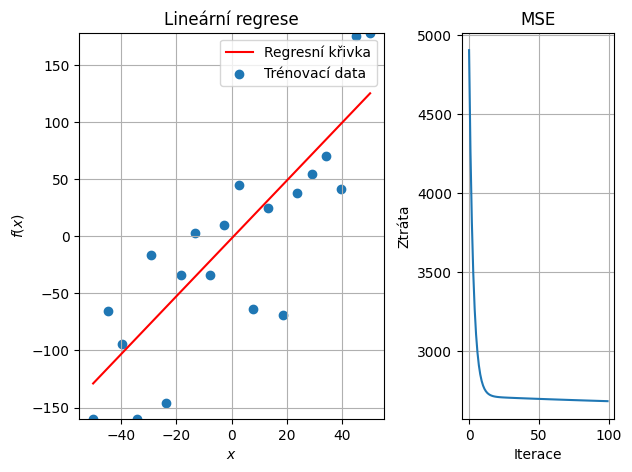

In [138]:
fig, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2, 1]})

#Výpočet MSE
def calculate_mse(w1, b , x_features, y_labels):
  sum = 0
  index = 0
  for x_1 in x_features:
    sum += pow((y_labels[index] - ((w1 * x_1) + b)), 2)
    index = index + 1
  return (sum * (1/len(x_features)))

#Vypočteme gradient funkce dle vzorce
def calculate_gradient(w1, b, x_features, y_labels):
  index = 0
  partial_w1 = 0
  partial_b = 0
  for x_i in x_features:
    partial_w1 = partial_w1 + (((w1 * x_i + b) - y_labels[index] )*x_i)
    partial_b = partial_b + ((w1 * x_i + b) - y_labels[index])
    index = index + 1

  partial_w1 = partial_w1 * (2/len(x_features))
  partial_b = partial_b * (2/len(x_features))

  return np.array([partial_w1, partial_b])

#Aplikujeme gradient funkce na předchozí váhu a bias
def apply_gradient(w1, b, gradient, gamma):
  w1 = w1 - (gamma * gradient[0])
  b = b - (gamma * gradient[1])
  return [w1, b]

x_features = np.linspace(-50, 50, 20)
y_labels = []

#Vygeneruje lineární data s náhodnou odchylkou
for i in np.nditer(x_features):
  y_labels.append((i * 3 - 8) + np.random.normal(1, 50, size=1))

#Začínáme základní lineární funkcí f(x) = x
w1 = 1
b = 0
steps = 100
gamma = 0.001
loss_values_x = []
loss_values_y = []

#Po počet kroků opakujeme optimalizační kroky
for i in range(steps):
  loss_values_x.append(i)
  loss_values_y.append(calculate_mse(w1, b, x_features, y_labels)[0])
  #print(loss_values_y[i])
  gradient = calculate_gradient(w1, b, x_features, y_labels)
  [w1,b] = apply_gradient(w1, b, gradient, gamma)

#Nyní z optimalizovaných dat vytvoříme přímku
y_predictions = (w1 * x_features) + b

ax2.set_title("MSE")
ax2.set_xlabel('Iterace')
ax2.set_ylabel('Ztráta')
ax2.plot(loss_values_x, loss_values_y)
ax2.grid()

ax1.set_title("Lineární regrese")
ax1.set_xlabel('$x$')
ax1.set_ylabel('$f(x)$')
ax1.plot(x_features, y_predictions, label="Regresní křivka", color="red")
ax1.scatter(x_features, y_labels, label="Trénovací data")
ax1.set_ylim((min(y_labels), max(y_labels)))
ax1.grid()
ax1.legend()
fig.tight_layout(pad=1)
fig.show()